<a href="https://colab.research.google.com/github/Woody-Wan/CS-542/blob/main/task1_template_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [ ]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print(tf.__version__)

2.8.0


#### Load Image Data

In [ ]:
DATA_LIST = os.listdir('D:/Workspace/CS542/Class Challenge/Covid_Data_GradientCrescent/two')
DATASET_PATH  = 'D:/Workspace/CS542/Class Challenge/Covid_Data_GradientCrescent/two/train'
TEST_DIR =  'D:/Workspace/CS542/Class Challenge/Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 80
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [ ]:
'''
raise NotImplementedError("Build your model based on an architecture of your choice "
                          "A sample model summary is shown below")
'''
Xception = tf.keras.applications.Xception(input_shape = (224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
Xception.trainable = False
flatten_1 = tf.keras.layers.Flatten()
dense_feature_1 = tf.keras.layers.Dense(512, kernel_regularizer='l2')
#dense_feature_2 = tf.keras.layers.Dense(256, kernel_regularizer='l2')
dense_feature_3 = tf.keras.layers.Dense(64, kernel_regularizer='l2')
Dropout = tf.keras.layers.Dropout(0.5)
dense_1 = tf.keras.layers.Dense(1, activation = 'sigmoid')


model = tf.keras.Sequential([
  Xception,
  flatten_1,
  dense_feature_1,
  Dropout,
  #dense_feature_2,
  #Dropout,
  dense_feature_3,
  Dropout,
  dense_1,
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 72,275,113
Trainable params: 51,413,633
No

#### [5 points] Train Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits = True),optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE), metrics = ['accuracy'])
history = model.fit(train_batches, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE,validation_data = valid_batches,steps_per_epoch = STEP_SIZE_TRAIN,validation_steps = STEP_SIZE_VALID)


11
3


C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/80


C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 12s 999ms/step - loss: 24.4013 - accuracy: 0.6809 - val_loss: 12.6079 - val_accuracy: 0.9500
Epoch 2/80
10/10 [==============================] - 9s 880ms/step - loss: 22.1490 - accuracy: 0.7553 - val_loss: 26.0442 - val_accuracy: 0.7500
Epoch 3/80
10/10 [==============================] - 9s 846ms/step - loss: 23.3900 - accuracy: 0.8404 - val_loss: 10.7737 - val_accuracy: 1.0000
Epoch 4/80
10/10 [==============================] - 9s 882ms/step - loss: 20.3255 - accuracy: 0.9043 - val_loss: 20.5971 - val_accuracy: 0.9000
Epoch 5/80
10/10 [==============================] - 10s 1s/step - loss: 16.7131 - accuracy: 0.9100 - val_loss: 23.3126 - val_accuracy: 0.9500
Epoch 6/80
10/10 [==============================] - 9s 873ms/step - loss: 15.2484 - accuracy: 0.9149 - val_loss: 17.7420 - val_accuracy: 0.9000
Epoch 7/80
10/10 [==============================] - 9s 853ms/step - loss: 22.4299 - accuracy: 0.8830 - val_loss: 12.2404 - val_accuracy: 0.9500
Epoc

Epoch 58/80
10/10 [==============================] - 8s 823ms/step - loss: 31.0454 - accuracy: 0.9468 - val_loss: 23.8400 - val_accuracy: 0.9500
Epoch 59/80
10/10 [==============================] - 9s 865ms/step - loss: 21.7474 - accuracy: 0.9700 - val_loss: 27.4928 - val_accuracy: 0.9500
Epoch 60/80
10/10 [==============================] - 8s 846ms/step - loss: 24.3503 - accuracy: 0.9468 - val_loss: 28.1051 - val_accuracy: 0.9500
Epoch 61/80
10/10 [==============================] - 9s 857ms/step - loss: 23.3740 - accuracy: 0.9681 - val_loss: 30.9572 - val_accuracy: 0.9500
Epoch 62/80
10/10 [==============================] - 9s 869ms/step - loss: 21.7133 - accuracy: 0.9468 - val_loss: 29.2581 - val_accuracy: 0.9000
Epoch 63/80
10/10 [==============================] - 9s 942ms/step - loss: 24.0635 - accuracy: 0.9681 - val_loss: 38.1728 - val_accuracy: 0.9000
Epoch 64/80
10/10 [==============================] - 9s 870ms/step - loss: 24.2184 - accuracy: 0.9681 - val_loss: 39.5692 - val_ac

#### [5 points] Plot Accuracy and Loss During Training

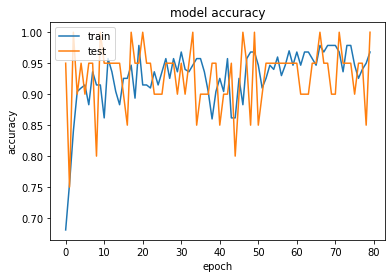

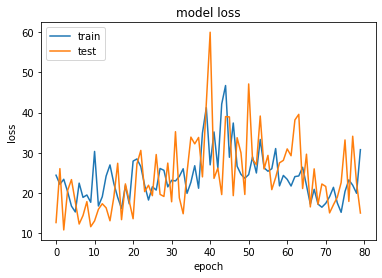

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.


C:\Users\woody\AppData\Local\Temp\ipykernel_39724\3278958914.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(eval_generator,18,verbose=1)


18/18 [==============================] - 7s 345ms/step
covid\nejmoa2001191_f3-PA.jpeg


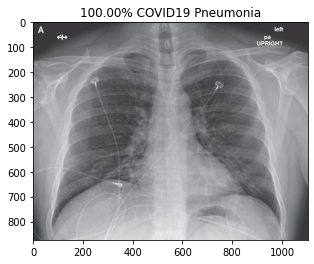

covid\nejmoa2001191_f4.jpeg


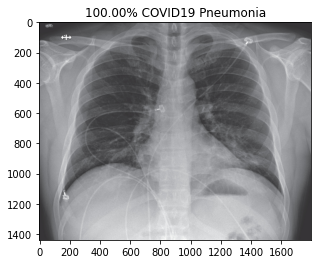

covid\nejmoa2001191_f5-PA.jpeg


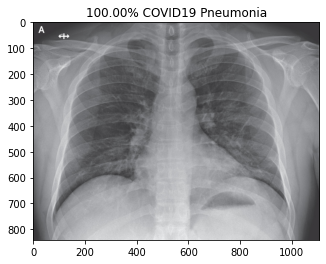

covid\radiol.2020200490.fig3.jpeg


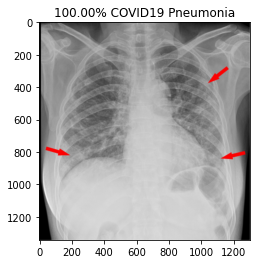

covid\ryct.2020200028.fig1a.jpeg


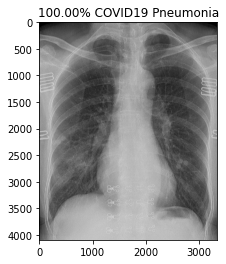

covid\ryct.2020200034.fig2.jpeg


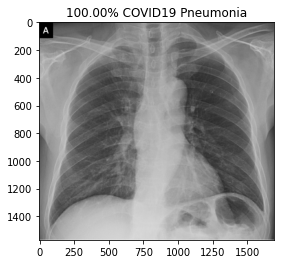

covid\ryct.2020200034.fig5-day0.jpeg


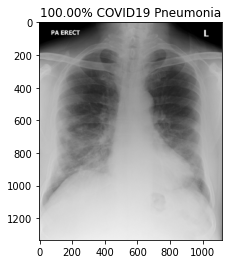

covid\ryct.2020200034.fig5-day4.jpeg


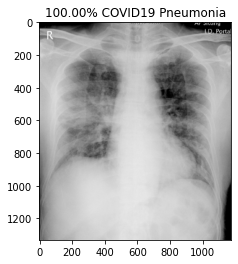

covid\ryct.2020200034.fig5-day7.jpeg


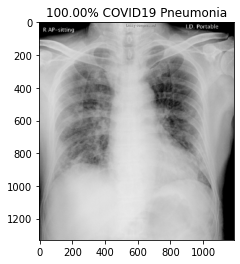

normal\NORMAL2-IM-1385-0001.jpeg


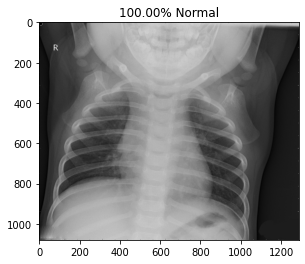

normal\NORMAL2-IM-1396-0001.jpeg


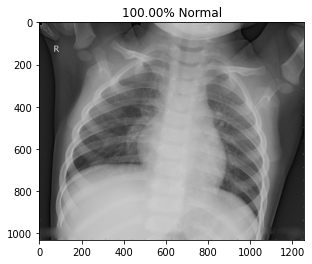

normal\NORMAL2-IM-1400-0001.jpeg


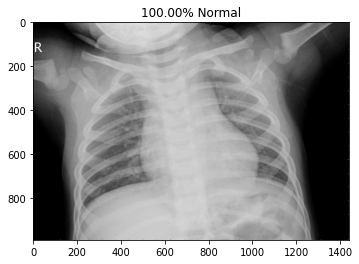

normal\NORMAL2-IM-1401-0001.jpeg


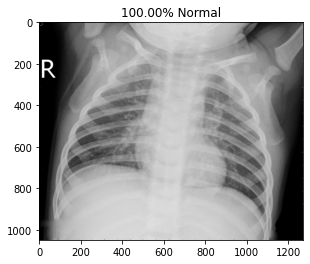

normal\NORMAL2-IM-1406-0001.jpeg


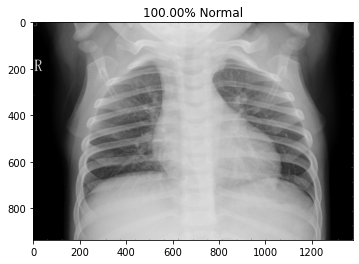

normal\NORMAL2-IM-1412-0001.jpeg


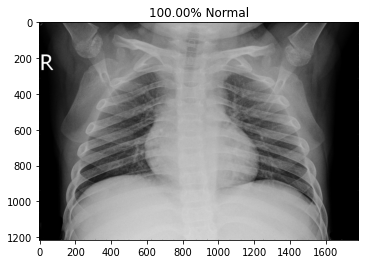

normal\NORMAL2-IM-1419-0001.jpeg


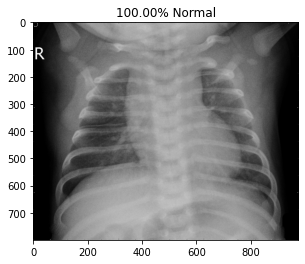

normal\NORMAL2-IM-1422-0001.jpeg


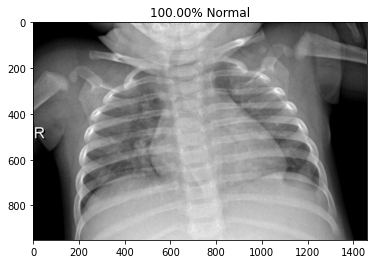

normal\NORMAL2-IM-1423-0001.jpeg


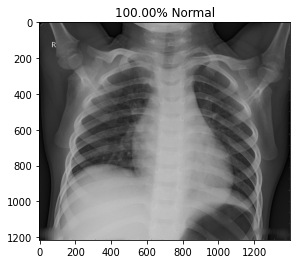

In [ ]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(eval_generator)
print(test_acc)

18/18 [==============================] - 2s 121ms/step - loss: 14.9772 - accuracy: 1.0000
1.0


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.


C:\Users\woody\AppData\Local\Temp\ipykernel_39724\3956956363.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = intermediate_layer_model.predict_generator(tsne_data_generator)
C:\Users\woody\AppData\Local\Temp\ipykernel_39724\3956956363.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  res_label = model.predict_generator(tsne_data_generator)
C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\woody\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


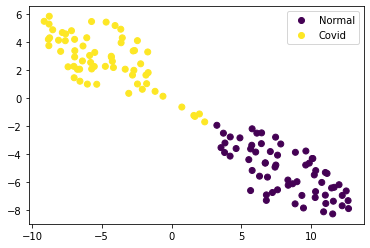

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd

intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_1').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

features = []

tsne_data_generator.reset()
pred = intermediate_layer_model.predict_generator(tsne_data_generator)
res_label = model.predict_generator(tsne_data_generator)



tsne = TSNE(n_components=2, random_state=0)
'''

    * use the generator to get images, pass them to interemediate_layer_model 
    * collect the output features into an array 
    * feed that array into fit_transform 

'''
label = []
for probability in res_label:
    if probability > 0.5:
        label.append(0)
    else:
        label.append(1)
        


#X_2d = tsne.fit_transform(pred)
tsne_result = tsne.fit_transform(pred)
tsne_result.shape
scatter = plt.scatter(tsne_result[:,0], tsne_result[:,1], c=label)
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, ["Normal","Covid"])


#scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=[0,1])
#handles, _ = scatter.legend_elements(prop='colors')
#plt.legend(handles, ["Normal","Covid"])

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->